# 3.1 프로야구 선수의 다음 해 연봉 예측하기

예측 분석의 가장 기본적인 방법은 **회귀 분석임**

독립변수(A) ,종속변수(B) 간의 관계를 찾아내는 것임.
일차 방정식이면 $ Y = Ax + B $ 을 예로 들 수 있다.

In [ ]:
# 한글 깨짐 방지 코드
# 코드 실행 후 런타임 재시작 -> 해당 셀 실행 x
# import 부분에 plt.rc('font', family='NanumBarunGothic')삽입
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

batter_file_path = "/content/batter_stats_2017.csv"
picher_file_path = "/content/picher_stats_2017.csv"

batter_df = pd.read_csv(batter_file_path)
picher_df = pd.read_csv(picher_file_path)

picher_df.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [ ]:
batter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       191 non-null    object 
 1   팀명        191 non-null    object 
 2   경기        191 non-null    int64  
 3   타석        191 non-null    int64  
 4   타수        191 non-null    int64  
 5   안타        191 non-null    int64  
 6   홈런        191 non-null    int64  
 7   득점        191 non-null    int64  
 8   타점        191 non-null    int64  
 9   볼넷        191 non-null    int64  
 10  삼진        191 non-null    int64  
 11  도루        191 non-null    int64  
 12  BABIP     191 non-null    object 
 13  타율        191 non-null    float64
 14  출루율       191 non-null    float64
 15  장타율       191 non-null    float64
 16  OPS       191 non-null    float64
 17  wOBA      191 non-null    float64
 18  WAR       191 non-null    float64
 19  연봉(2018)  191 non-null    int64  
 20  연봉(2017)  191 non-null    int64 

In [ ]:
picher_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [ ]:
picher_df.head(10)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
5,피어밴드,KT,8,10,0,0,0,26,26,160.0,7.42,1.74,1.12,0.289,76.1,3.04,6.52,4.42,4.32,3.94,85000,35000
6,고영표,KT,8,12,0,1,0,25,24,141.2,7.94,1.02,0.83,0.362,64.6,5.08,2.97,3.88,3.78,3.87,11500,5200
7,장원준,두산,14,9,0,0,0,29,29,180.1,6.24,2.55,0.60,0.293,75.8,3.14,7.28,4.26,4.35,3.85,100000,100000
8,함덕주,두산,9,8,0,2,0,35,24,137.1,9.11,4.19,0.52,0.321,73.1,3.67,4.99,3.91,3.67,3.78,16000,7000
9,팻딘,KIA,9,7,0,0,0,30,29,176.0,7.31,1.99,1.12,0.353,76.5,4.14,5.66,4.65,4.61,3.64,70000,70000


In [ ]:
picher_df.shape

(152, 22)

In [ ]:
picher_df['연봉(2018)']

0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: 연봉(2018), Length: 152, dtype: int64

회귀 분석의 예측값으로(Y) 2018년 연봉을 사용하자. 

In [ ]:
picher_df['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

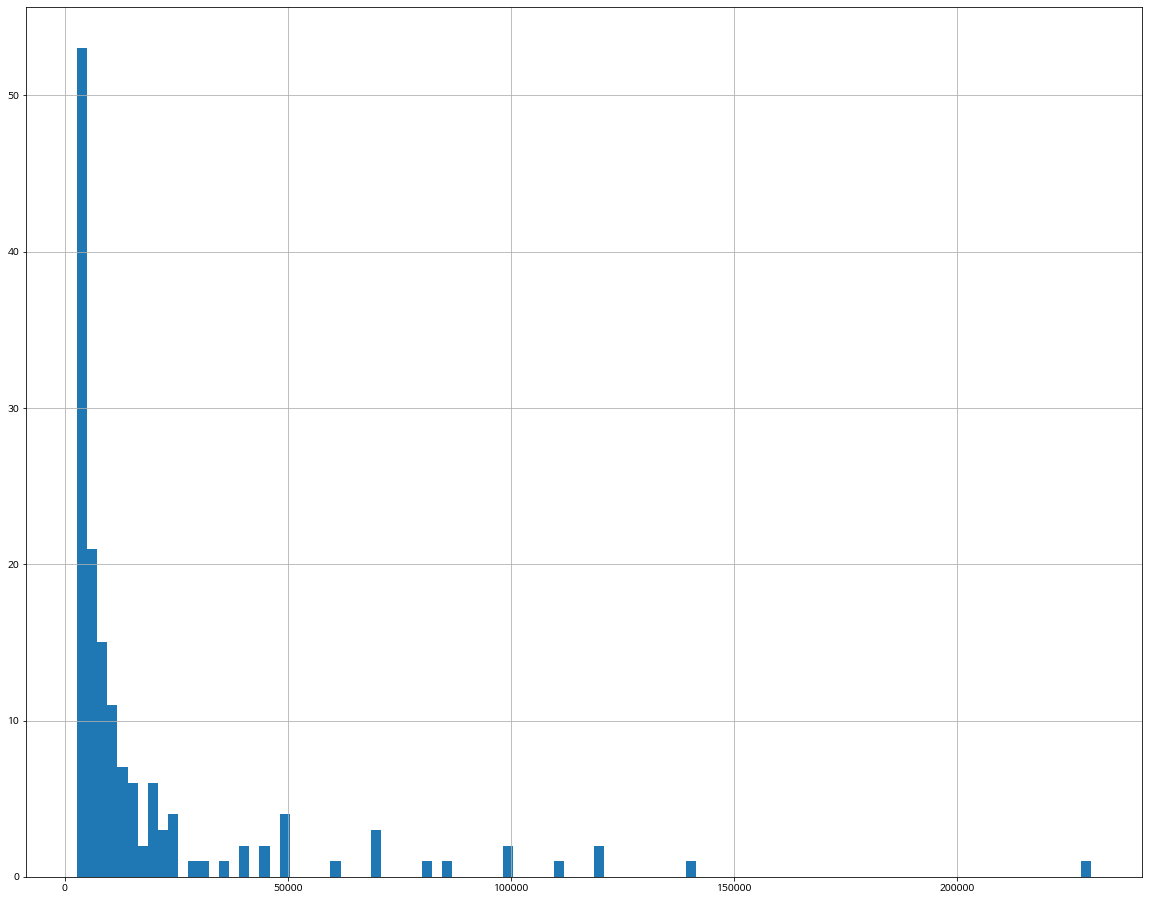

In [ ]:
picher_df['연봉(2018)'].hist(bins=100)

## 상자 그림(box plot)
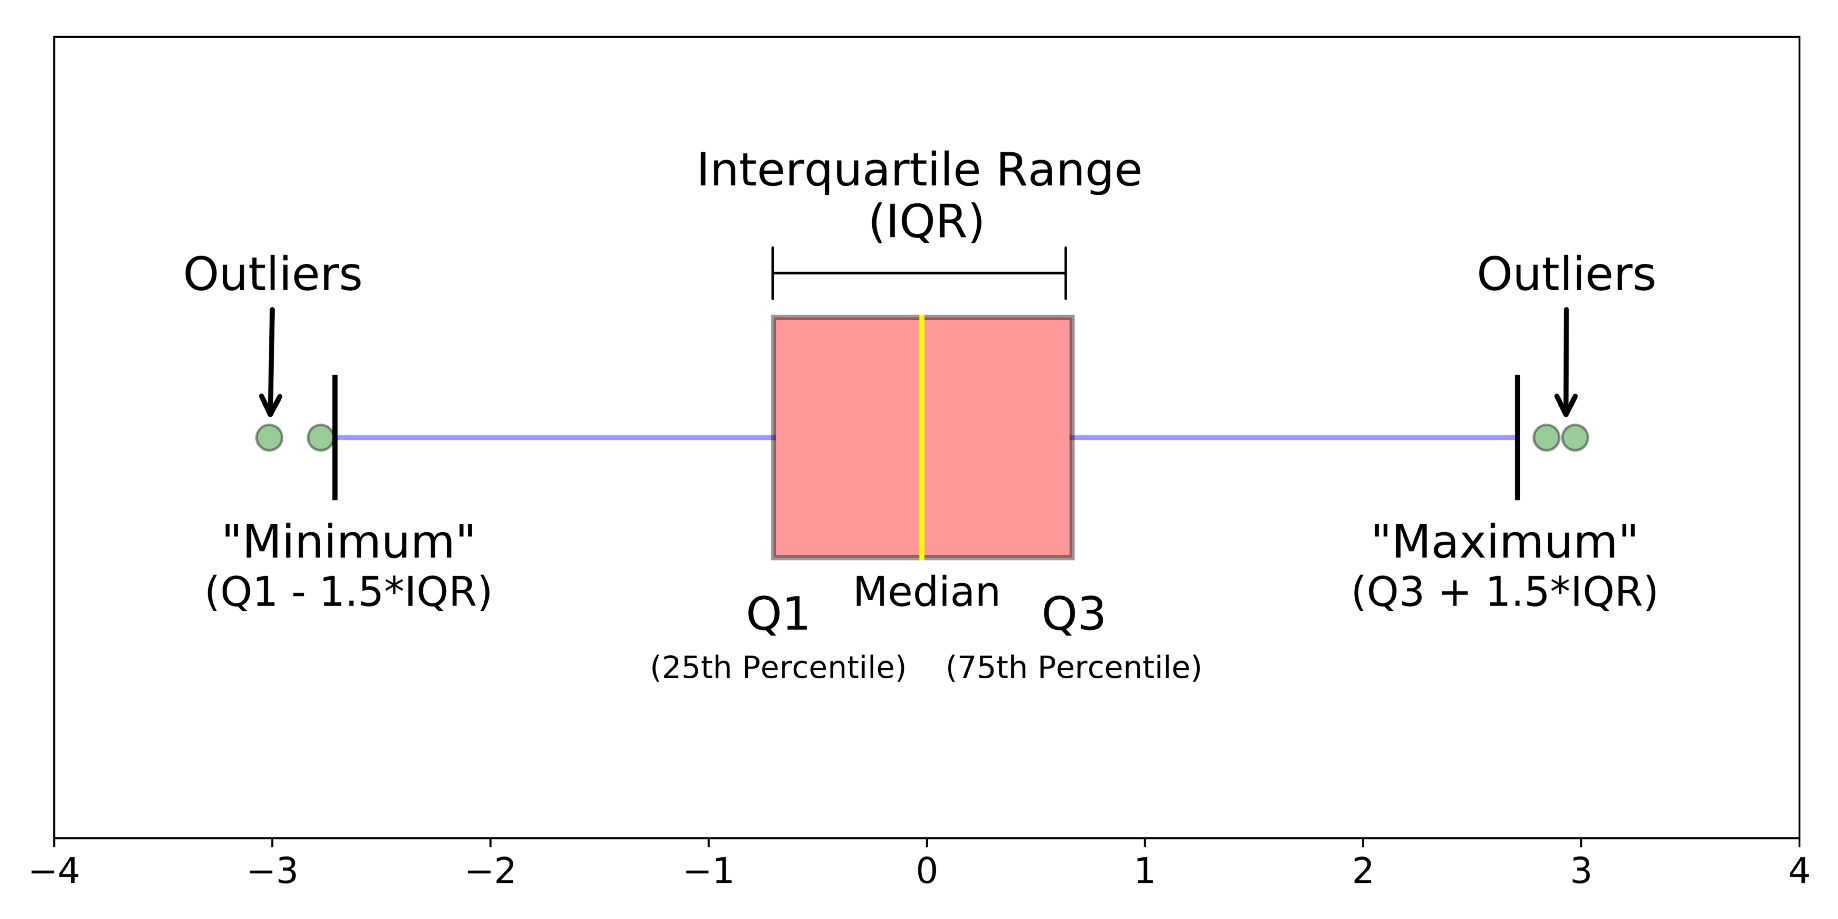

상자 그림은 데이터의 분포를 파악하는 그림 표현 방법 

- 가운데 노란선은 데이터의 중앙값을 의미

- Q1, Q3은 각각 25% 75%에 해당하는 부분의미 
- 박스 왼쪽의 선은 Q1에 $ Q1 - 1.5 * IQR $을 한 값
- 박스 오른쪽의 선은 Q3 에 $ Q3 + 1.5 * IQR $을 한 값

이 두점선을 최소 최대 울타리 라고 부름

정확한 명칭은 다음과 같다선
- upper inner fence (박스의 왼쪽 선)
- lower inner fence (박스의 오른쪽 선)


울타리를 벗어난 점의 의미는 = 낙동강 오리알느낌임


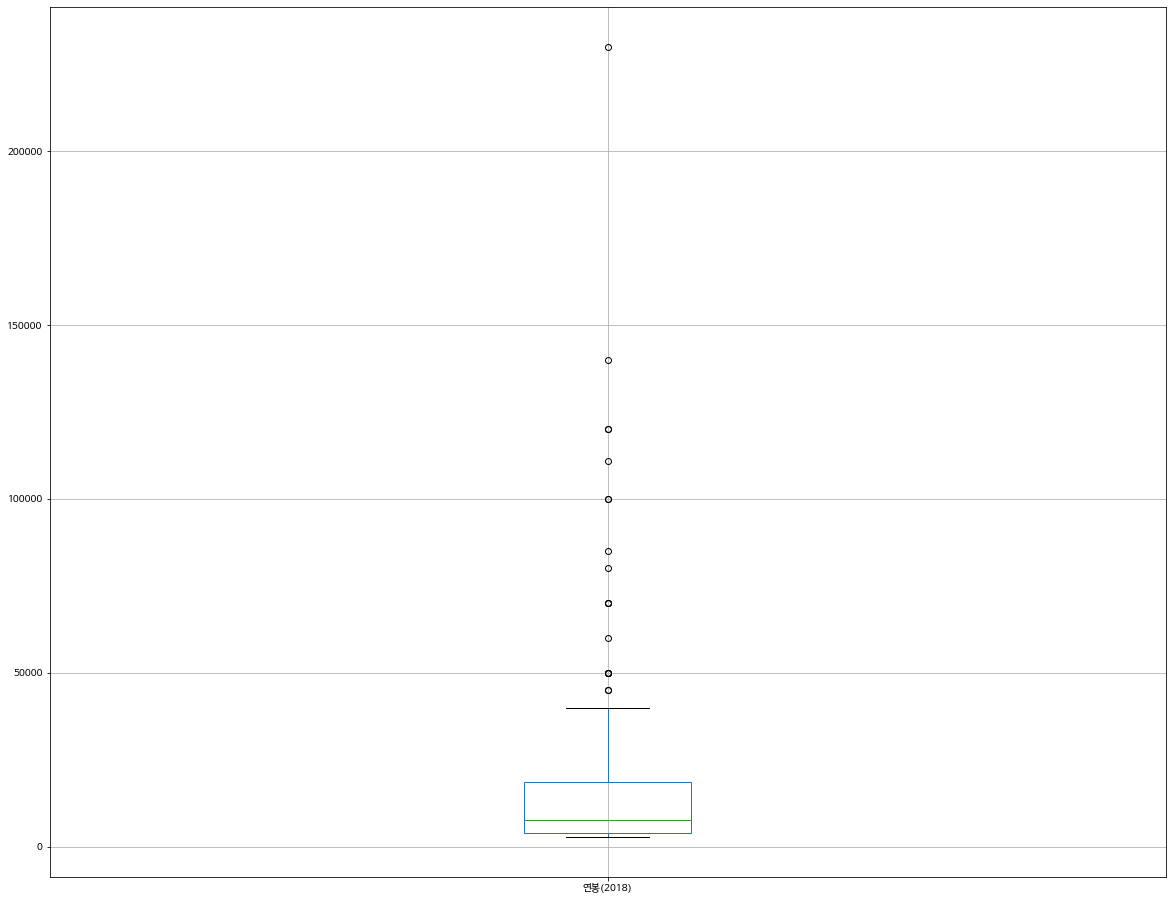

In [ ]:
picher_df.boxplot(column=['연봉(2018)'])
plt.savefig('savefig_default.png')

box plot 해석

- 상자의 선 => 연봉 데이터값 중 중앙 값
- 상자 밑 => 25%의 연봉을 받는 사람
- 상자 위 => 75%의 연봉을 받는 사람

연봉 5억 미만이 일반적인 연봉으로 보여진다.



In [ ]:
## 각각 피처들은 어떤 특성을 가졌는지 확인을 해본다 (수치형 피처 대상)
picher_features = picher_df[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

# 각 피처들에 대해서 히스토그램을 출력할 것임.

def plot_hist_each_column(df):
    '''
    각 피처들의 히스토그램을 출력
    :param df : 데이터 프레임

    '''
    plt.rcParams['figure.figsize'] = [20, 16] #  전체 그래프 틀 사이즈 설정. (가로ㅡ 세로)
    fig = plt.figure(1) # 틀 1개 사용.

    #df 열 개수 만큼 subplot 출력
    for i in range(len(df.columns)): 
        ax = fig.add_subplot(5, 5, i+1) # 작은 그래프 한줄에 5개씩 1씩 증가하면서 그림.
        plt.hist(df[df.columns[i]], bins= 50) # 히스토그램 출력.
        ax.set_title(df.columns[i]) # 컬럼 인덱스에 따라 작은 그래프 제목 설정,
    plt.show()

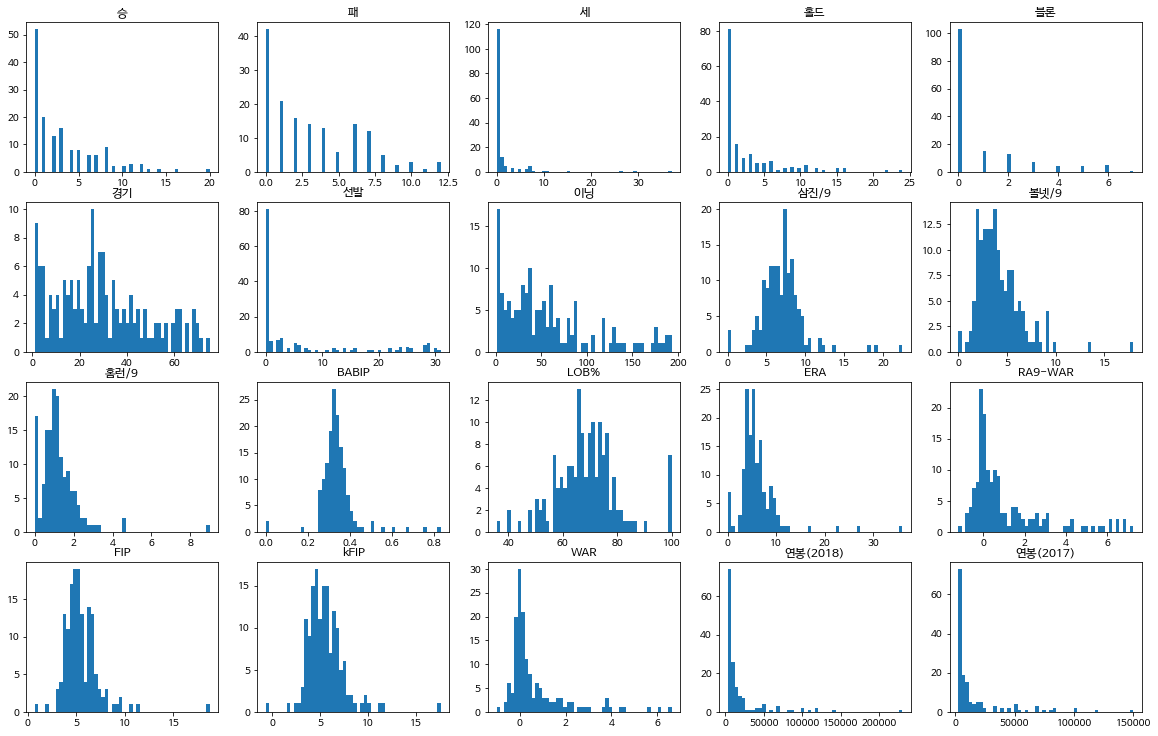

In [ ]:
plot_hist_each_column(picher_features)

## 피처 스케일링

위 그래프를 참고하면

홈런의 히스토그램은 0~8까지인 반면 이닝은 0~200임

이런게 피처 스케일링이 되어있지 않다고 함.

피처 스케일링 이란 => 값을 0~1 사이의 값으로 표현하는 것을 예로 들 수 있음.

스케일링 방법 중 하나로 표준 정규분포의 $Z^-$ 값을 구하는 과정이 있음

$ Z^- = ((X) - (X의 평균) / X의 표준편차(std)$ 로 구해짐.

In [ ]:
# 판다스에서 제공하는 도구를 이용할 것임
# 판다스 형태로 정의된 데이터를 출력할 때 float 형태로 출력하게 해줌
pd.options.mode.chained_assignment = None 

# 피처 각각에 스케일링을 수행하는 함수
def standard_scaling(df, scale_col):
    for col in scale_col:
        series_mean = df[col].mean() # 피처의 평균.
        series_std = df[col].std() # 피처의 표준편차.
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
        # x가 의미하는 값은 각 피처의 데이터임.
    return df

In [ ]:
# 스케일링 적용 후 데이터의 모양
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
picher_df = standard_scaling(picher_df, scale_columns)
picher_df = picher_df.rename(columns={'연봉(2018)':'year'}) # 연봉(2018)의 이름을 year로 변경.
picher_df.head(30)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,year,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,-0.869000,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,-0.987502,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,-0.885929,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,-0.945180,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,-0.877464,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705
5,피어밴드,KT,1.243035,2.185327,-0.306452,-0.585705,-0.543592,-0.147055,2.041816,2.048726,0.130995,-1.034057,-0.088425,-0.578820,0.653661,-0.721456,2.963100,-0.580874,-0.614039,2.476226,85000,0.738417
6,고영표,KT,1.243035,2.824115,-0.306452,-0.364245,-0.543592,-0.198678,1.836690,1.674951,0.314899,-1.338778,-0.373557,0.241539,-0.338437,-0.231854,1.037633,-0.869482,-0.886546,2.423284,11500,-0.451371
7,장원준,두산,2.795976,1.865933,-0.306452,-0.585705,-0.543592,0.007811,2.349505,2.448347,-0.286327,-0.691246,-0.599696,-0.533869,0.627780,-0.697456,3.375313,-0.666387,-0.598899,2.408158,100000,3.333592
8,함덕주,두산,1.501858,1.546539,-0.306452,-0.142784,-0.543592,0.317545,1.836690,1.593436,0.728685,0.002840,-0.678353,-0.219211,0.394853,-0.570256,2.133251,-0.853448,-0.942057,2.355216,16000,-0.379505
9,팻딘,KIA,1.501858,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.349505,2.366832,0.092092,-0.928251,-0.088425,0.140398,0.688169,-0.457455,2.496649,-0.457948,-0.467692,2.249332,70000,2.135819


범주형 데이터의 정규화

**원-핫 인코딩** 방법 사용
판다스에서는 get_dummies()라는 함수로 간단하게 적용 가능함.

In [ ]:
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis = 1)
picher_df = picher_df.join(team_encoding)
team_encoding.head(5)

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


## 회귀 분석을 위한 머신러닝 준비

준비 사항
- 학습 데이터 셋(학습 전용 데이터 셋)
- 테스트 데이터 셋(테스트 전용 데이터 셋)

파이썬의 sklearn이라는 패키지의 train_test_split()을 이용하면 간단하게 분리가 가능함 메서드 사용 방법은 다음과 같다.


**옵션 설명** 
- train_size = 훈련 세트 구성 비율 
- tset_size = 테스트 세트 구성 비율 (기본 0.25) 
- stratify = classification(분류)을 다룰 때 매우 중요한 옵션임. 
    - 값이 target이면 각 클래스의 비율을 train/validation에 유지해 준다.(한 쪽에 쏠려서 분배되는 것 방지) 
- random_state = 세트를 섞을 때 해당 값을 보고 섞는다. 
    - 하이퍼 파라미터를 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것 방지함.

> 구체적인 설명 
- arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..) 
- test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25) 
- train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지) 
- random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력) 
- shuffle : 셔플여부설정 (default = True) stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, 
- stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리함

# 예측할 값 = 2018년도의 선수 연봉임.
# 따라서 현재 모델을 학습하는 것은 선수명, 2018년도 연봉을 제외한 데이터.
# y = 예측 값이랑 비교 하기위한 실제 정답 데이터임. 
X = picher_df[picher_df.columns.difference(['선수명', 'year'])] # 선수명, year를 제외한 모든 컬럼 조회.
y = picher_df['year'] # 연봉(2018)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 19
                                                    )

사이킷런에서 회귀 분석을 도와줄 모델(LinearRegression())을 선언해야함.




In [ ]:
lr = LinearRegression() # lr 이라는 변수에 선형회귀를 위한 모델을 참조함.
model = lr.fit(X_train, y_train) # fit()은 모델을 학습 시키는 함수.

print(lr.coef_, lr.intercept_) # 쉽게 생각하면 coef_ = 기울기, intercept_ = 가중치.
# 회귀 계수 출력.

[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.5564514    5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745] 18640.472964544086


예를 들어 coef_의 마지막 값으로 예시를 들면 다음과 같다.

$ y = 0.58643087x + (-0.00942976620086355) $ 직선이 생기는 샘이다.

## 회귀 모델 평가하기

sklearn에도 모델 평가하는 방법이 있다.
- print(f"훈련 세트 : {lr.score(train_input, train_target)}")
- print(f"테스트 세트 : {lr.score(test_input, test_target)}")

단, 머신러닝의 분류 모델과 회귀모델은 평가 방법이 좀 다르다. 그건 그냥 그렇구나 하셈

회귀 모델의 예측 정확도를 나타내는 수치로 결정계수라는 것이 존재함 $R^2$ 라고 쓰임.



In [ ]:
print(f"훈련 세트 : {lr.score(X_train, y_train)}")
print(f"테스트 세트 : {lr.score(X_test, y_test)}")

훈련 세트 : 0.9276949405576705
테스트 세트 : 0.8860171644977815


책에서 제공하는 모델 평가 방법으로는 statsmodel 라이브러리의 OLS클래스로도 실행이 가능하다고 함.   


OLS클래스의 summary()함수를 사용하면 다음의 실행 결과를 얻을 수 있다.

In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           7.70e-42
Time:                        15:37:55   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.678e+04    697.967     24.036      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


[Text(0, 0, 'const'),
 Text(0, 0, 'BABIP'),
 Text(0, 0, 'ERA'),
 Text(0, 0, 'FIP'),
 Text(0, 0, 'KIA'),
 Text(0, 0, 'KT'),
 Text(0, 0, 'LG'),
 Text(0, 0, 'LOB%'),
 Text(0, 0, 'NC'),
 Text(0, 0, 'RA9-WAR'),
 Text(0, 0, 'SK'),
 Text(0, 0, 'WAR'),
 Text(0, 0, 'kFIP'),
 Text(0, 0, '경기'),
 Text(0, 0, '두산'),
 Text(0, 0, '롯데'),
 Text(0, 0, '볼넷/9'),
 Text(0, 0, '블론'),
 Text(0, 0, '삼성'),
 Text(0, 0, '삼진/9'),
 Text(0, 0, '선발'),
 Text(0, 0, '세'),
 Text(0, 0, '승'),
 Text(0, 0, '연봉(2017)'),
 Text(0, 0, '이닝'),
 Text(0, 0, '패'),
 Text(0, 0, '한화'),
 Text(0, 0, '홀드'),
 Text(0, 0, '홈런/9')]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


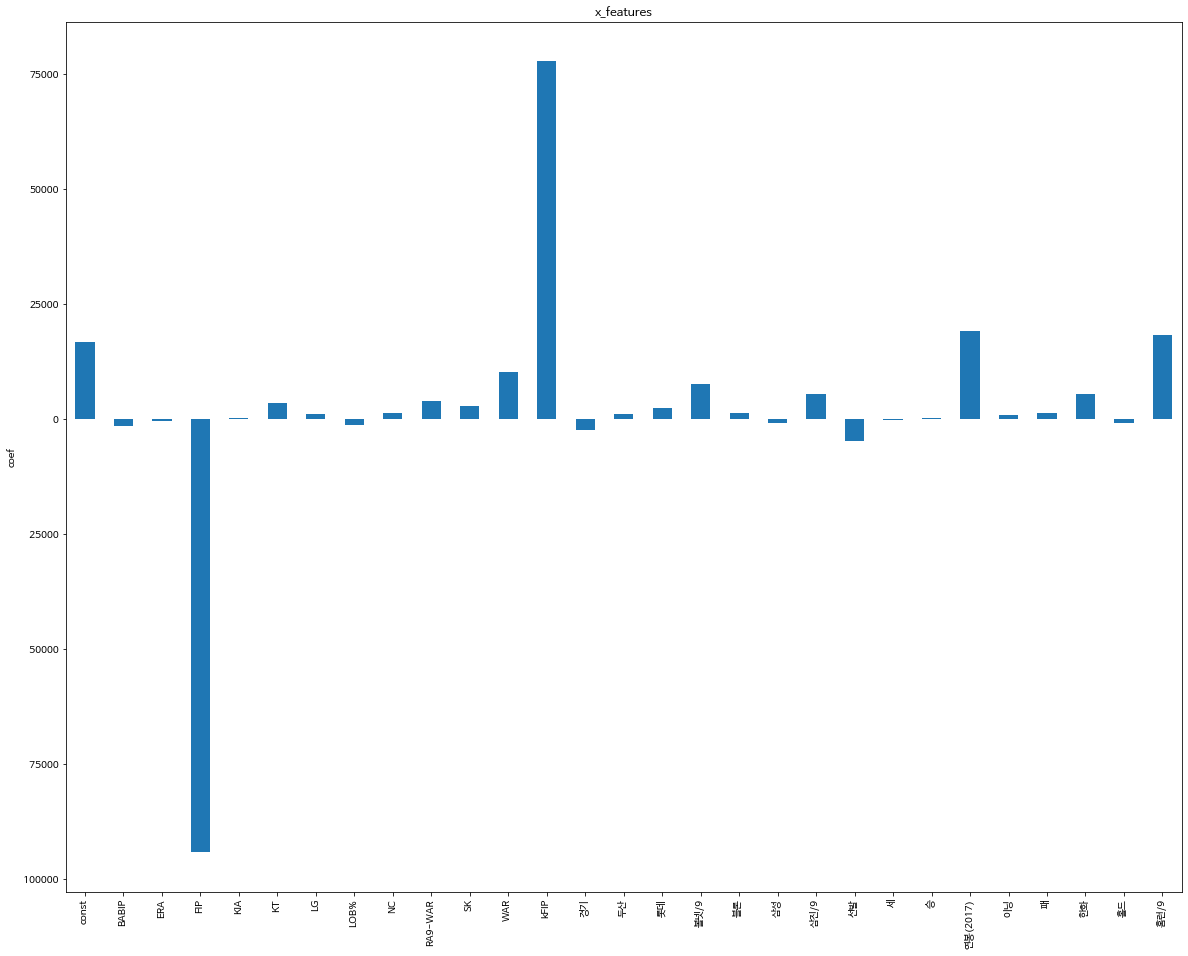

In [ ]:
# 회귀 계수를 리스트로 반환.
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환.
x_labels = model.params.index.tolist()

# 그래프 출력.
ax = coefs_series.plot(kind = 'bar')
ax.set_title('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

여기까지 모델을 평가하고 어떤 피처가 예측에 있어서 영향을 크게 줬는지 나타내는 그래프도 출력했다.


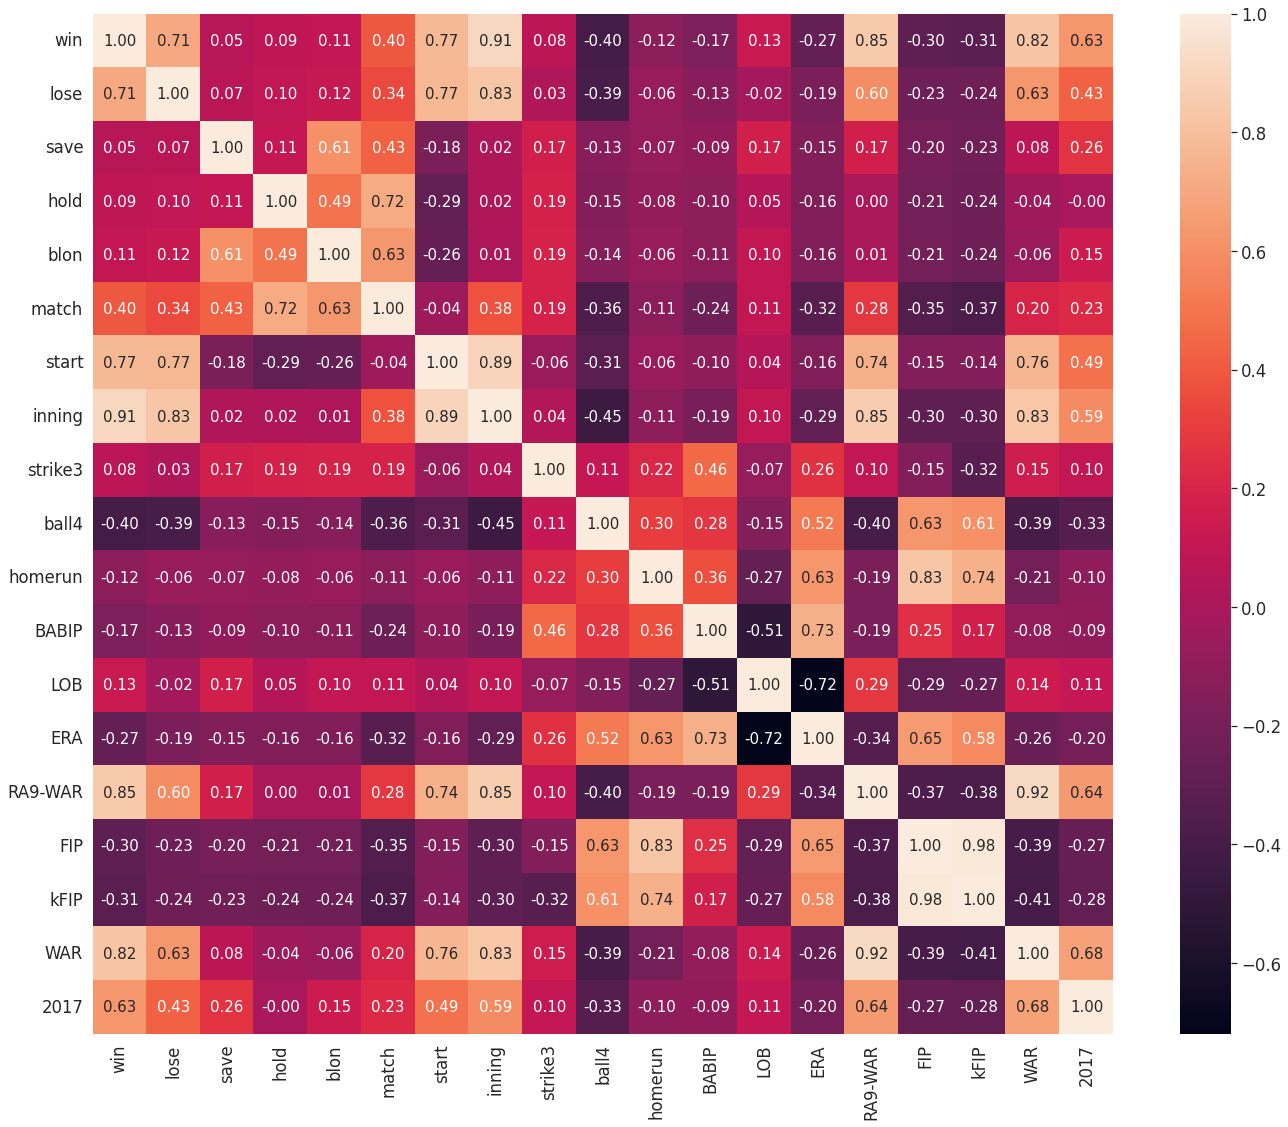

<Figure size 1440x1152 with 0 Axes>

In [ ]:
# 이제 재미삼아 상관 관계 분석을 해보자 heatmap ㄱ

import seaborn as sns

corr = picher_df[scale_columns].corr(method = 'pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 
             'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

# corr 행렬 히트맵을 시각화합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.tight_layout()
plt.show()
plt.savefig('heatmap.png')

## 회귀 분석 예측 성능 높이기 위한 방법 

**다중 공선성** : 회귀 분석은 피처 간의 독립성을 전제로 하기땜에 피처 쌍을 제거해야함. 즉, 상관계높은 변수 제거.

다중 공선성은 **분산팽창요인(VIF)**이라는 계수로 평가 가능함.
10~15 정도를 넘으면 그 피처는 다중 공선성의 문제가 발생한 경우.


In [ ]:
# 다중 공선성 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame() # 데이터 프레임 만들려고 객체 참조.
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# VIF Factor 라는 컬럼에 값을 저장 => VIF Factor라는 컬럼이 자동 생성되고 값이 알아서 들어감
vif["features"] = X.columns
# features 라는 컬럼에 X값 즉, 아까 위에서 선수명, year제외한 나머지 컬럼들을 집어넣음.
vif.round(1) # 반올림.

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


## 다중 공선성을 반영 후 결과 보기.

In [ ]:
# 피처를 재선정합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
y = picher_df['year']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [ ]:
# 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [ ]:
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.9150591192570362
0.9038759653889863


- 과대적합(overfitting) : 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁜 경우이다. 
- 과소적합(underfitting) : 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우이다.

In [ ]:
# 피처마다의 VIF 계수를 출력합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


In [ ]:
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)
picher_df.head(5)

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,year,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화,예측연봉(2018)
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,-0.869000,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705,0,0,0,0,1,0,0,0,0,120122.822204
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,-0.987502,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303,0,0,1,0,0,0,0,0,0,88127.019455
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,-0.885929,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881,1,0,0,0,0,0,0,0,0,163930.148696
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,-0.945180,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592,0,0,1,0,0,0,0,0,0,116009.684582
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,-0.877464,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705,0,0,0,0,0,0,1,0,0,102253.697589


In [ ]:
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
result_df = picher_df.sort_values(by=['year'], ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'year', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,163930.148696,150000
1,1,켈리,140000,120122.822204,85000
2,2,소사,120000,88127.019455,50000
3,4,레일리,111000,102253.697589,85000
4,7,피어밴드,85000,58975.725734,35000
5,13,배영수,50000,56873.662417,55000
6,21,안영명,35000,22420.790838,20000
7,22,채병용,30000,21178.955105,25000
8,23,류제국,29000,45122.360087,35000
9,24,박정진,25000,29060.748299,33000


In [ ]:
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind = "bar")